### *Statistics for AI and Data Science*

by Danielle Souza Da Silva

##### **Table of Contents**

1. Part 1: Loading and preparing data set

  * 1.1: Preparing data frame
  
  * 1.2: Missing values
    
2. Part 2: Trends

  * 2.1: Detached vs Flat Property per Region
      
  * 2.2:  Detached vs Flat price trends per region
  
3. Part 3: Flat properties Price Changes

  * 3.1: Preparing data frame
  
  * 3.2: Flats Percentage Price change between July 2017 and July 2018
  
  * 3.3: Percentage Price Change visualization
  
  * 3.4: Overall comments on patterns
  
4. Statistical Analysis

 * 4.1: Assigning change description to each row
   
 * 4.2: Chi-square test comments
  

#### **Part 1: Loading and preparing data sets.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import datetime
import scipy.stats as stats
%matplotlib inline

Loading Average Property Price and Location Codes data sets.

In [2]:
price = pd.read_csv('average-property-price.csv')
loc_codes = pd.read_csv('location-codes.csv')

**1.1: Preparing data frames**

Here, I have Separated the region and area data by using 'str.contains' function. The region codes contains E12 is the beginning of its prefixes and the area codes are all the remaining prefixes.

In [3]:
region = price[price['Code'].str.contains('E12')]
area = price[price['Code'].str.contains('E12') == False]

Here I have merged the 'location code' data file to the 'area' data set, where the region name and code are assigned to each area price record on the area data frame. I have also deleted duplicate columns which were added from the 'location code' data frame.

In [4]:
area = area.merge(loc_codes, left_on='Code', right_on='AuthorityCode')
area_ = area.copy()
del area_['AuthorityCode']
del area_['AuthorityName']
area_

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode,RegionName
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,E12000001,North East
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,E12000001,North East
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,E12000001,North East
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,E12000001,North East
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,E12000001,North East
...,...,...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,E12000005,West Midlands
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,E12000005,West Midlands
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,E12000005,West Midlands
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,E12000005,West Midlands


**1.2: Missing Values**

These are all the missing values that I found from the area and region data sets. In total there are 36 missing values for the 'Detached' and 'Semi' properties and 20 missing values for the 'Terraced' properties from the area data set. I have observed that these missing values are from the 'City of London' area, and also that most of the missing values are from 'Detached' and 'Semi' properties. The City of London is known to be a major city and financial center in London, it is also known as 'Square Mile' because it is 1.12 square miles (according to 'Wikipedia'). These facts may be relevant when considering the reason why we may have missing values in the data. The fact that 'Detached', 'Semi' and 'Terraced' properties pricing are missing from our data may be because of the nature of this area and its size. It is clearly a non residential area so these type of properties would be expected to not be popular and these properties sizes may contribute to land pressure in this area. Also if it was decided to remove these missing values from our data set, then all of our 'City of London' area data would also be erased and so we would not be able to use the 'Flats' pricing information when concluding our analysis. Therefore, I consider that this information may be relevant for our analysis, and so I have decided not to remove the missing data.

In [5]:
area_[area_.isnull().any(axis=1)]

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode,RegionName
3276,01/09/2016,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,E12000007,London
3277,01/10/2016,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,E12000007,London
3278,01/11/2016,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,E12000007,London
3279,01/12/2016,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,E12000007,London
3280,01/01/2017,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,E12000007,London
3281,01/02/2017,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,E12000007,London
3282,01/03/2017,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,E12000007,London
3283,01/04/2017,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,E12000007,London
3284,01/05/2017,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,E12000007,London
3285,01/06/2017,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,E12000007,London


**Number of missing values for each variable for the area data frame.**

In [6]:
area_.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
RegionCode     0
RegionName     0
dtype: int64

**Number of missing values for each variable for the region data frame.**

In [7]:
region.isnull().sum()

Date        0
Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
dtype: int64

#### **Part 2: Trends**

**2.1: Detached vs Flat Property per Region**

In this part, I have created a bar chart to display the median price of detached and flat properties according to each Region. Firstly, I created a pivot table displaying the median value of both property types and the index as the area, then plotted the bar chart with the pivot table. The reason for choosing the median price is because the median statistic summary is usually less sensitive to outliers compared other statistic, for example with the mean. 

As displayed on the bar chart below, the detached properties have a much higher price compared to the Flat properties. The London region has the highest median price for both property types compared to all other regions. The properties with the lowest median prices are located in the North East region. We can observe that in the East Midlands, West Midlands, North West and Yorkshire and The Humber regions, the median price presents a similar range for both property prices. 

Text(0.5, 1.0, 'Median Price for Flats and Detached properties by Region')

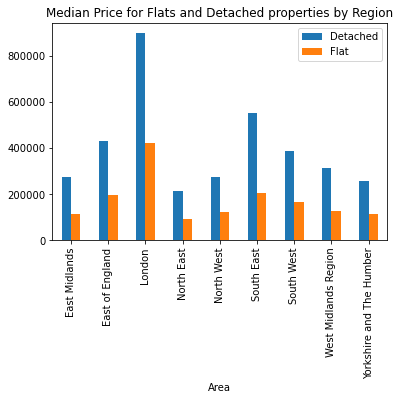

In [8]:
region2 = region.copy()
del region2['Terraced']
del region2['Semi']

area_flatdet = region2.pivot_table(values=['Flat', 'Detached'], index=['Area'], aggfunc='median')
area_flatdet.plot(kind='bar').set_title('Median Price for Flats and Detached properties by Region')

**2.2: Detached vs Flat price trends per region**

In the following section, I have created plots for all regions displaying the price of the detached and flats properties over a period over 36 months. The plots show the price trend for each region, each plot contains the price trend for both property types. This helps when comparing the price change for both properties in different times of the year, and also when comparing both properties. 

Below I have separated each region into unique data frames.

In [9]:
NE = region2.loc[region2['Area']=='North East']
NW = region2.loc[region2['Area']=='North West']
YH = region2.loc[region2['Area']=='Yorkshire and The Humber']
EM = region2.loc[region2['Area']=='East Midlands']
WM = region2.loc[region2['Area']=='West Midlands Region']
EE = region2.loc[region2['Area']=='East of England']
LDN = region2.loc[region2['Area']=='London']
SE = region2.loc[region2['Area']=='South East']
SW = region2.loc[region2['Area']=='South West']

**North East:**

For the North East region, we can see in the graph below that around spring time, in the months of March and April of each year, there was a price drop for both property types. Also, the price increased significantly more during the months of July and August, in the summer time of each year. Generally, the graph shows that price has been fluctuating and following a horizontal trend as its direction is not clear.   

Text(0.5, 1.0, 'North East Region Property Prices over 36 months')

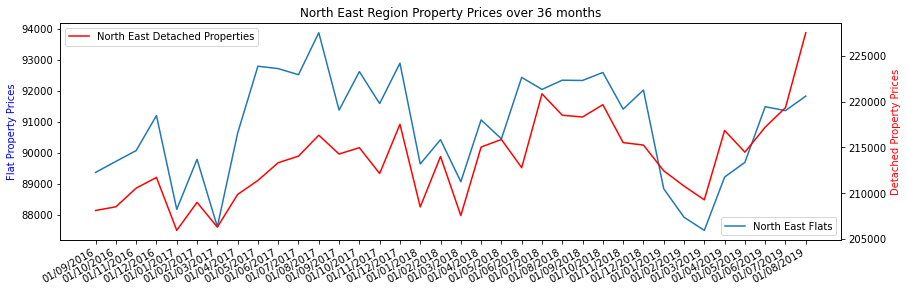

In [10]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(NE.Date, NE.loc[:,'Flat'], label='North East Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(NE.Date,NE.loc[:,'Detached'], color='r', label = 'North East Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc = 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='r')
a1.set_title('North East Region Property Prices over 36 months')

**North West:**

In the North West region, we can see that the price dropped slightly during the spring months of each year, but not as much as in the North East region as seen above. For both property types, the price also increased during summer time in all years as displayed in the graph. Overall, the price for both property types has been following an uptrend as its price has been gradually increasing over the 36 months. 

Text(0.5, 1.0, 'North West Region Property Prices over 36 months')

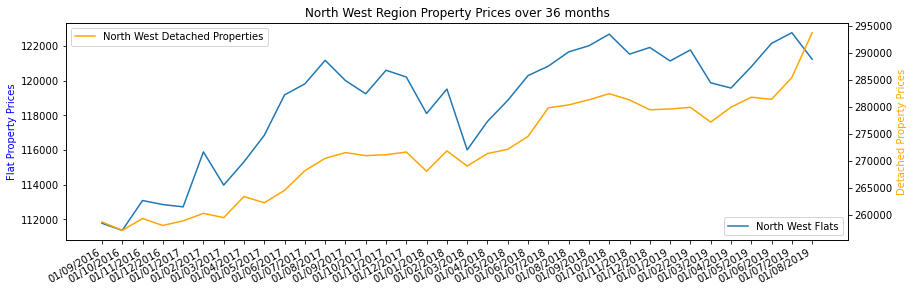

In [11]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(NW.Date, NW.loc[:,'Flat'], label='North West Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(NW.Date,NW.loc[:,'Detached'], color='orange', label = 'North West Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc = 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='orange')
a1.set_title('North West Region Property Prices over 36 months')

**Yorkshire and the Humber:**

Here, the graph shows that for both property types the price also increased during the summer time of each year. Also, it shows that during winter time the price has had a slight drop for these properties. Overall, the graph follows an uptrend as price has mostly increased over the 36 months.

Text(0.5, 1.0, 'Yorkshire and The Humber Region Property Prices over 36 months')

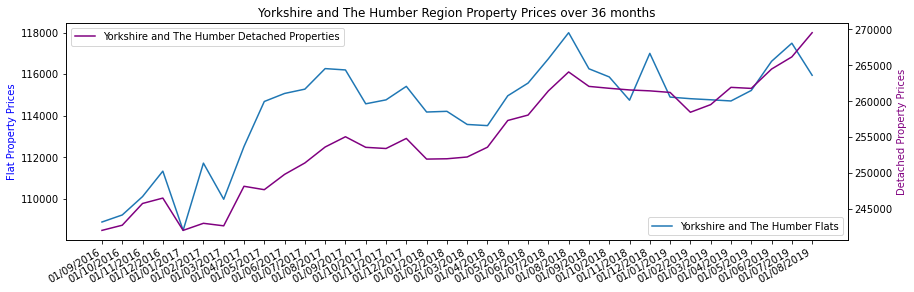

In [12]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(YH.Date, YH.loc[:,'Flat'], label='Yorkshire and The Humber Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(YH.Date, YH.loc[:,'Detached'], color='purple', label = 'Yorkshire and The Humber Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc='lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='purple')
a1.set_title('Yorkshire and The Humber Region Property Prices over 36 months')

**East Midlands:**

For the East Midlands region we can see that price has continuously increased over the 36 months for both properties and it's following an uptrend. As with the other regions, price also increases during summer time and drops during winter/spring time. 

Text(0.5, 1.0, 'East Midlands Region Property Prices over 36 months')

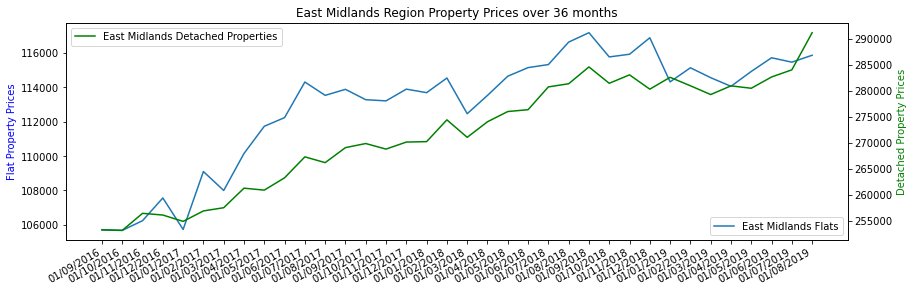

In [13]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(EM.Date, EM.loc[:,'Flat'], label='East Midlands Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(EM.Date, EM.loc[:,'Detached'], color='g', label = 'East Midlands Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='green')
a1.set_title('East Midlands Region Property Prices over 36 months')

**West Midlands:**

For the West Midlands region, we can see that it does follow the same pattern as the East Midlands region. Price has continuously increased during the 36 months period. And, price drops slightly during winter/spring time and increases again during summer time.

Text(0.5, 1.0, 'West Midlands Region Property Prices over 36 months')

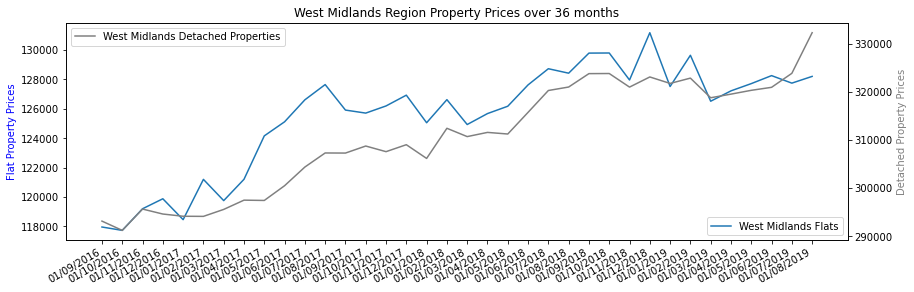

In [14]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(WM.Date, WM.loc[:,'Flat'], label='West Midlands Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(WM.Date, WM.loc[:,'Detached'], color='grey', label = 'West Midlands Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='grey')
a1.set_title('West Midlands Region Property Prices over 36 months')

**East of England:**

In the East of England region, we can observe that from summer 2018, the price for detached properties increased whereas the price for flats dropped for the remaining months up till summer 2019. From 2016 till spring 2018 the price shows to have continuously increased for both property types. Then, we can see that for the flat properties, price has gradually decreased over time. The plots are mainly following a horizontal trend line as its direction is not clear. 

Text(0.5, 1.0, 'East of England Region Property Prices over 36 months')

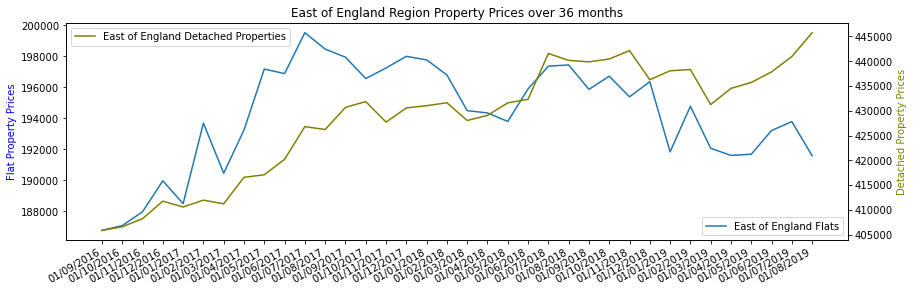

In [15]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(EE.Date, EE.loc[:,'Flat'], label='East of England Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(EE.Date, EE.loc[:,'Detached'], color='olive', label = 'East of England Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='olive')
a1.set_title('East of England Region Property Prices over 36 months')

**London:**

In the London region, the flat property price trend line is following a down trend where price has continuously decreased throughout the 36 months. Whereas, the detached property types trend line has had many fluctuations during the 36 months. For the detached properties, we can see that up until summer 2018 the price showed a positive direction. Then, from summer 2018 til spring 2019 the price started going into a downtrend direction where gradually decreased over time.

Text(0.5, 1.0, 'London Region Property Prices over 36 months')

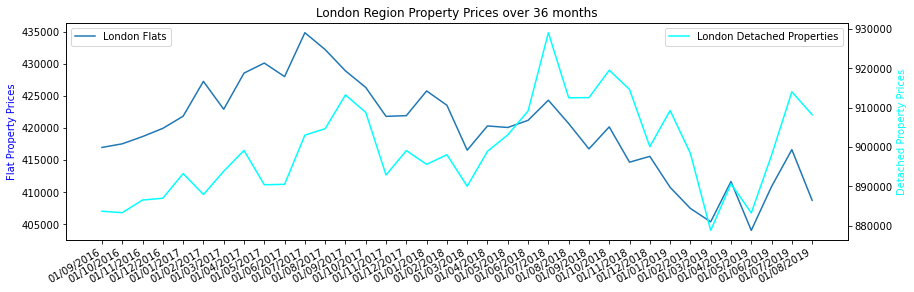

In [16]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(LDN.Date, LDN.loc[:,'Flat'], label='London Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(LDN.Date, LDN.loc[:,'Detached'], color='cyan', label = 'London Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'upper left')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='cyan')
a1.set_title('London Region Property Prices over 36 months')

**South East:**

For the South East region, we can see that the price trend line for both property types follows a similar trend. Overall, the price has fluctuated and has gradually increased over the 36 months for the detached properties. For both property types, the graphs also show that price was following an uptrend direction from summer 2016 till summer 2017. Then, we can observe that the trend line for flat properties has gradually decreased since summer 2017 and fluctuated for the detached properties. 

Text(0.5, 1.0, 'South East Region Property Prices over 36 months')

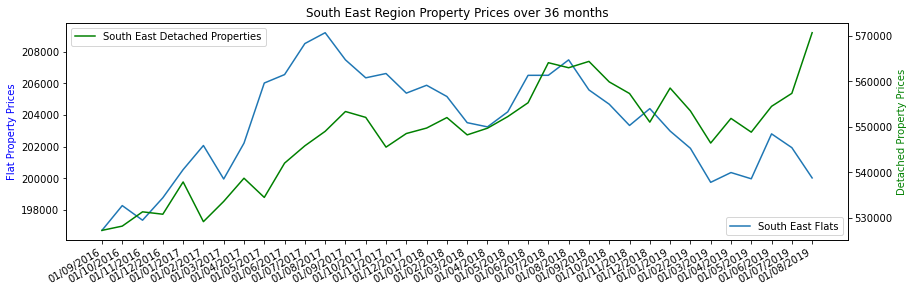

In [17]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(SE.Date, SE.loc[:,'Flat'], label='South East Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(SE.Date, SE.loc[:,'Detached'], color='green', label = 'South East Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='green')
a1.set_title('South East Region Property Prices over 36 months')

**South West:**

In the South West region, the price trend line has mainly followed an uptrend direction up until start of summer 2018 where it had a slight drop for both property types. Then, price gradually increased and dropped again in the summer of 2019. Overall, the price for the detached property types for this region has mainly increased. For the flat properties, price has been fluctuating over the 36 months.

Text(0.5, 1.0, 'South West Region Property Prices over 36 months')

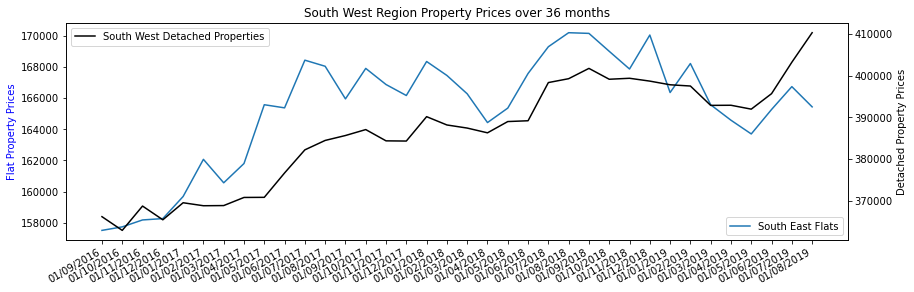

In [18]:
fig, a1 = plt.subplots(1, 1, figsize=(14, 4))
a1.plot(SW.Date, SW.loc[:,'Flat'], label='South East Flats')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(SW.Date, SW.loc[:,'Detached'], color='black', label = 'South West Detached Properties')
plt.setp(a1.get_xticklabels(), rotation=30, horizontalalignment='right')


a1.legend(loc= 'lower right')
a2.legend()
a1.set_ylabel('Flat Property Prices', fontsize=10, color='b')
a2.set_ylabel('Detached Property Prices', fontsize=10, color='black')
a1.set_title('South West Region Property Prices over 36 months')

#### **Part 3: Flat properties Price Changes**

**3.1: Preparing data frame**

Here, I have selected the data from July 2017 and named it area17. 

In [19]:
area17 = area_.loc[(area_['Date'] == '01/07/2017')]

And here, I have selected the data from July 2018 and named it area18. 

In [20]:
area18 = area_.loc[(area_['Date'] == '01/07/2018')]

In this part, I have merged the area17 and area18 tables to create one dataframe, area17_18, which includes each area with one row each. In total, we have 151 areas. I have also deleted duplicate columns from the area17_18 data frame. 

In [21]:
area17_18 = area17.merge(area18, left_on='Area', right_on='Area')
del area17_18['Code_y']
del area17_18['Detached_x']
del area17_18['Detached_y']
del area17_18['Semi_x']
del area17_18['Semi_y']
del area17_18['Terraced_x']
del area17_18['Terraced_y']
del area17_18['RegionName_y']
del area17_18['RegionCode_y']

**Data frame:** Area flat prices between July 2017 and 2018

In [22]:
area17_18

,Date_x,Area,Code_x,Flat_x,RegionCode_x,RegionName_x,Date_y,Flat_y
0,01/07/2017,Hartlepool,E06000001,65007.84170,E12000001,North East,01/07/2018,61116.82158
1,01/07/2017,Middlesbrough,E06000002,69163.06963,E12000001,North East,01/07/2018,69313.90788
2,01/07/2017,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East,01/07/2018,64802.79724
3,01/07/2017,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East,01/07/2018,83654.55272
4,01/07/2017,Darlington,E06000005,87041.37973,E12000001,North East,01/07/2018,83679.31818
...,...,...,...,...,...,...,...,...
146,01/07/2017,Suffolk,E10000029,140278.18370,E12000006,East of England,01/07/2018,142488.46480
147,01/07/2017,Surrey,E10000030,270116.52610,E12000008,South East,01/07/2018,267144.69100
148,01/07/2017,Warwickshire,E10000031,165676.94800,E12000005,West Midlands,01/07/2018,167470.71860
149,01/07/2017,West Sussex,E10000032,193547.45490,E12000008,South East,01/07/2018,191835.79530


**3.2: Flats Percentage Price change between July 2017 and July 2018**

Here I have calculated the percentage price change between July 2017 and July 2018, then I have added a new column to display the percentage price change as displayed below.

In [23]:
area17_18['PercentagePriceChange'] = (area17_18['Flat_y'] - area17_18['Flat_x'])*100/(area17_18['Flat_x'])
area17_18

,Date_x,Area,Code_x,Flat_x,RegionCode_x,RegionName_x,Date_y,Flat_y,PercentagePriceChange
0,01/07/2017,Hartlepool,E06000001,65007.84170,E12000001,North East,01/07/2018,61116.82158,-5.985463
1,01/07/2017,Middlesbrough,E06000002,69163.06963,E12000001,North East,01/07/2018,69313.90788,0.218091
2,01/07/2017,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East,01/07/2018,64802.79724,-1.076227
3,01/07/2017,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East,01/07/2018,83654.55272,0.066059
4,01/07/2017,Darlington,E06000005,87041.37973,E12000001,North East,01/07/2018,83679.31818,-3.862601
...,...,...,...,...,...,...,...,...,...
146,01/07/2017,Suffolk,E10000029,140278.18370,E12000006,East of England,01/07/2018,142488.46480,1.575641
147,01/07/2017,Surrey,E10000030,270116.52610,E12000008,South East,01/07/2018,267144.69100,-1.100205
148,01/07/2017,Warwickshire,E10000031,165676.94800,E12000005,West Midlands,01/07/2018,167470.71860,1.082692
149,01/07/2017,West Sussex,E10000032,193547.45490,E12000008,South East,01/07/2018,191835.79530,-0.884362


**3.3: Percentage Price Change visualization**

To visualize the price change I have chosen the bar chart. 

Below, I have created a data frame for each region by selecting each area containing the same region name.

In [24]:
NE_Areas = area17_18.loc[area17_18['RegionName_x']=='North East']
NW_Areas = area17_18.loc[area17_18['RegionName_x']=='North West']
YH_Areas = area17_18.loc[area17_18['RegionName_x']=='Yorkshire and The Humber']
EM_Areas = area17_18.loc[area17_18['RegionName_x']=='East Midlands']
WM_Areas = area17_18.loc[area17_18['RegionName_x']=='West Midlands']
EE_Areas = area17_18.loc[area17_18['RegionName_x']=='East of England']
LDN_Areas = area17_18.loc[area17_18['RegionName_x']=='London']
SE_Areas = area17_18.loc[area17_18['RegionName_x']=='South East']
SW_Areas = area17_18.loc[area17_18['RegionName_x']=='South West']

**North East region price change:**

In the bar chart below, we can observe that Hartlepool had the highest price change since it decreased by 5.99% compared to the previous year. The area in which had the highest price increase was South Tyneside which increased by 1.61%. The other areas which had significant change compared to other areas were: Darlington (3.86% decrease), County Durham (3.24% decrease), Sunderland (1.98% decrease) and Gateshead (1.79%). Overall, most areas in the North East region had a price decrease compared to the previous year.

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the North East region')

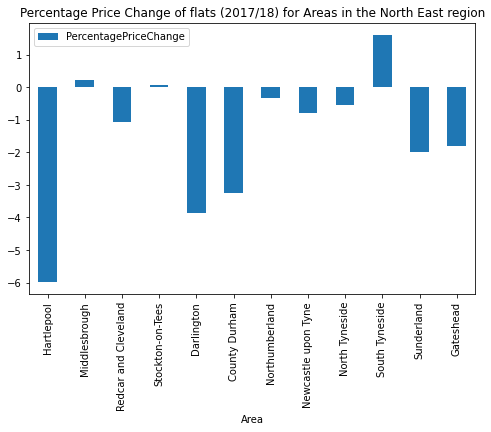

In [25]:
NE_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the North East region')

**North West region price change:**

In the North West region, there was 11 areas which had a price increase and 12 which had a price decrease. The area displaying the highest change was Manchester with a 5.93% increase. The following areas had very close price changes: Warrington (2.13% increase), Stockport (2.57% increase), Tameside (2.58% increase). The area in which had the highest price decrease was Blackpool was a 3.69% decrease. Overall, the areas in which had an increase had a bigger percentage change than those which had a price decrease. We can see that the most areas which had a percentage increase had an 2% or more increase and most areas which had a price decrease had a percentage change between 0.5%-1%. 

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the North West region')

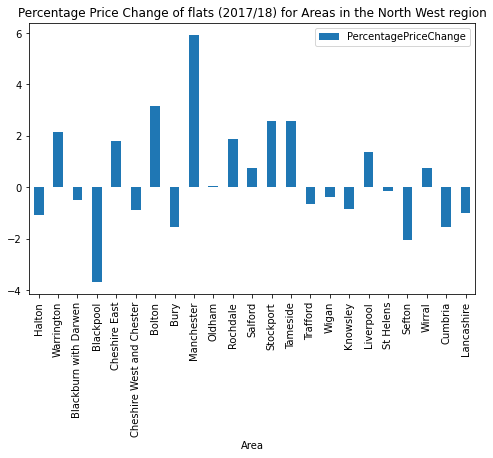

In [26]:
NW_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the North West region')

**Yorkshire and the Humber region price change:**

The area which had the highest price increase was Barnsley with a 3.77% increase. The Rotherham and Sheffield areas had similar changes 2.63% and 2.81% respectively. The area with the highest price decrease was Doncaster (1.91% decrease). In general, the number of areas which had price decrease was 7 and the number which had a price increase was 8. The areas in which had an increase had a bigger percentage change than those which had a price decrease as seen on the bar chart below. 

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the Yorkshire and the Humber region')

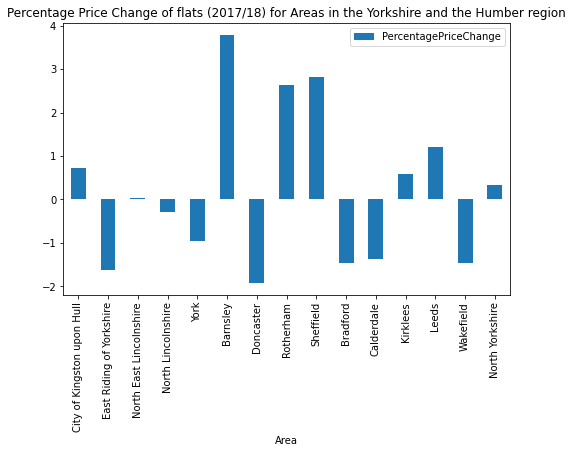

In [27]:
YH_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the Yorkshire and the Humber region')

**East Midlands region price change:**

As seen on the bar chart below, all areas in the East Midlands region had a price increase. The Leicester area had the highest increase (4.41%) and the City of Derby the lowest increase (0.8%). The areas which had similar percentage changes were: Derbyshire (2.03%), Leicestershire (2.22%), Northamptonshire (2.01%) and Nottinghamshire (1.83%). 

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the East Midlands region')

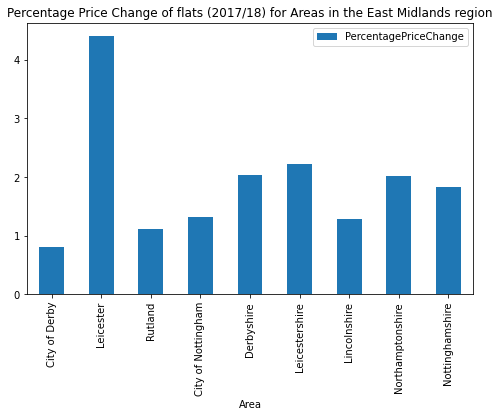

In [28]:
EM_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the East Midlands region')

**West Midlands region price change:**

In the West Midlands region, most area had a price increase. As the bar charts display, Sandwell had the highest price increase (5.8%) and the only area which had a price decrease was Stoke-on-Trent with a 0.47% decrease. All other areas had comparable changes, for example Birmingham, Conventry and Dudley with a 2.10%, 2.01%, 1.92% increase respectively.

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the West Midlands region')

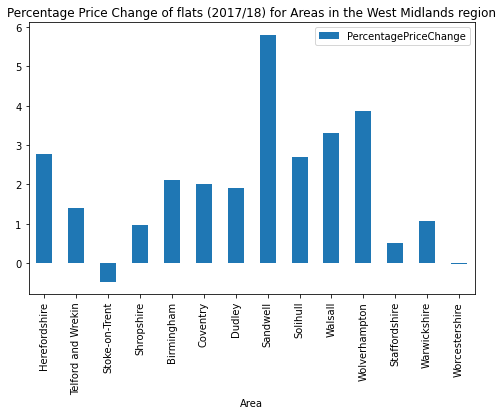

In [29]:
WM_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the West Midlands region')

**East of England region price change:**

The area with the highest change was Luton which had a 3.96% decrease. The area with the highest increase was Thurrock with a 3.07% increase. The Central Bedfordshire, Cambridgeshire, Essex and Hertfordshire  areas had very close changes with a 1.91%, 2.36%, 1.77%, 2.40% decrease respectively. The area which had a percentage change close to zero was Norfolk. Overall, the percentage change value of all areas were similar but for Luton which had almost double of that of other areas. 

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the East of England region')

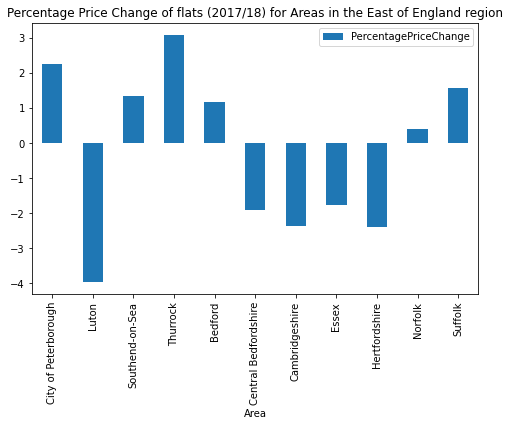

In [30]:
EE_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the East of England region')

**London region price change:**

As seen on the bar chart below, most areas had a price decrease. The area with the highest price decrease was City of Westminster with a 9.06% decrease. The City of London, Greenwich, Lambeth, Southwark and Wandsworth areas had close percentage changes with 5.37%, 5.26%, 4.61%, 6.01%, 4.93% decrease respectively. The area with the highest price increase was Merton with a 2.35% price increase. Overall, most areas had a price drop with only a few areas with a very small price increase. 

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the London region')

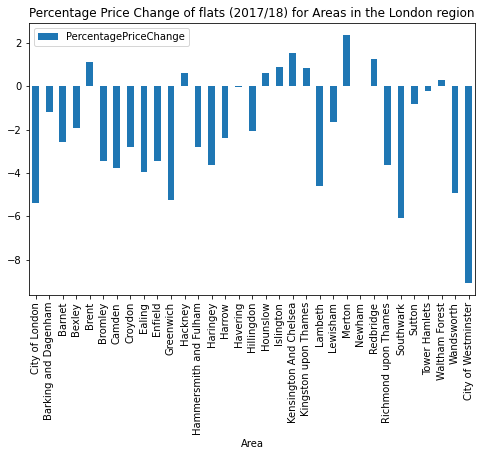

In [31]:
LDN_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the London region')

**South East region price change:**

In the South East region, we can observe that most areas had a price decrease. There were two areas with the highest percentage decrease, Reading and Windsor and Maidenhead had a percentage decrease of 3.75% and 3.74%. The area with a the highest percentage increase was Slough with a 2.92% percentage increase. Overall, most areas had a price decrease, the ones with a price increase had very small changes, for example, Portsmouth and Isle of Wight with 0.56% and 0.27% increase respectively.

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the South East region')

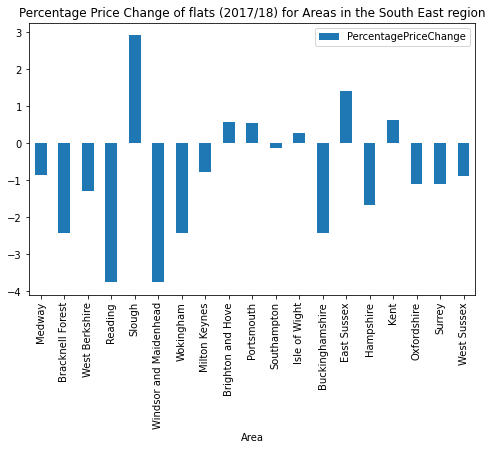

In [32]:
SE_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the South East region')

**South West region price change:**

In the South West region there were nine areas which presented a percentage price increases and six areas showing a percentage decrease. The area with the highest percentage increase was Bournemouth with a 3.19% increase. Most areas with a percentage decrease had small changes ranging from 0.19% to 0.96% price decrease. Overall, the areas in which had an increase had a bigger percentage change than those which had a price decrease.

Text(0.5, 1.0, 'Percentage Price Change of flats (2017/18) for Areas in the South West region')

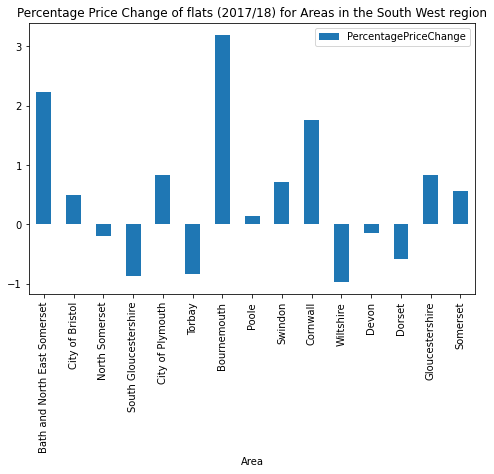

In [33]:
SW_Areas.plot(kind='bar',x='Area',y='PercentagePriceChange', figsize=(8,5)).set_title('Percentage Price Change of flats (2017/18) for Areas in the South West region')

**3.4: Overall comments on patterns**

The London, North East, South East regions had a greater amount of areas where the price decreased compared to other regions. In London, the areas in which had the most price decreases were mainly central city areas, for example City of London and City of Westminster. This may be due to summer time people are usually more inclined to buy bigger houses and so flats may be less popular in the city. In the East and West Midlands, the flats property prices increased for most areas. And for the North West, South West, East of England and Yorkshire and the Humber areas the amount of areas in which the price increased were similar to the amount of areas in which the price decreased. 

#### **Part 4: Statistical Analysis**

**4.1: Assigning change description to each row**

Here, I have implemented a function to return the change description of the percentage change value from the data frame. 

In [34]:
def change(row):
    if (row.PercentagePriceChange > 0): return 'Increased'
    if (row.PercentagePriceChange < 0): return 'Decreased'
    else: return 'No Change'

The function was applied to the data frame and assigned a new column to display the descriptions.

Then, I have used the crosstab function from pandas to return a cross tabulation table of the amount of areas that price increased/decreases for each region. 

In [35]:
area17_18.apply(change, axis=1)
area17_18 = area17_18.assign(PriceChange = area17_18.apply(change, axis=1))

area17_18_crosstab = pd.crosstab(area17_18.PriceChange, [area17_18.RegionName_x	], normalize=False)
area17_18_crosstab

RegionName_x,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
PriceChange,,,,,,,,,
Decreased,0,5,23,9,12,13,6,2,7
Increased,9,6,10,3,11,6,9,12,8


**4.2: Chi-square test comments**

The statistical significance $\alpha$ value chosen is 0.05 which is the standard statistic for significance.

The chi-square test is used to measure the relationship between variables and to determine if a relationship exits between them. We calculate its expected values to determine what the observed values would look like if they were independent.

The degrees of freedom is calculated by multiplying (r-1)(c-1) where r is the number of rows, and c is the number of columns. The degree of freedom address the problem that the amount of observations may affect the test statistic size.

For our data, the null hypothesis would consider that the regions increased/decreased prices are independent and there is no relationship between them. The alternate hypothesis would consider the logical opposite which is that there exits a relationship between the prices. The results displayed below show that our p-value is less than $\alpha$ since 0.00056 (to five decimal places) < 0.05, this indicates that there is a less than 5% chance that the null hypothesis is correct and so we reject the null hypothesis. The test statistic provides evidence that the price increase/decrease per region is not independent. However, it is not possible to determine the direction of this relationship with this test statistic. The chi-square test statistic is 27.6 for our data, this is the measure of the relationship between the variables. By looking at the chi square table, we can see that if we estimate our p-value to be 0.001 (3 decimal places), the test statistic displayed is 26.124, which is also less than the one we obtained, which supports the correct decision to reject the null hypothesis. 

In [36]:
test_stat, p_value, dof, expected = stats.chi2_contingency(area17_18_crosstab, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is' , (p_value))



There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.0005576314604275119
